# Case Study

For my upcoming project, I will be analyzing real estate data related to house prices in and around Seattle, Washington. The primary objective of this project is to learn about the concept of Exploratory Data Analysis (EDA) and use it to create pipelines for processing data for machine learning purposes.

**Data Set Description**

The dataset was obtained from Kaggle. As all housing information is public data, the source is believed to be reliable. This dataset is well-known and contains complete features. In addition to the house price (target), it includes an ID, date, and 18 house features.

- Id: Unique ID for each home sold

- Date: Date of the home sale

- Price: Price of each home sold (target)

- Bedrooms: Number of bedrooms

- Bathrooms: Number of bathrooms, where .5 accounts for a room with a toilet but no shower

- Sqft_living: Square footage of the apartments interior living space

- Sqft_lot: Square footage of the land space

- Floors: Number of floors

- Waterfront: A dummy variable for whether the apartment was overlooking the waterfront or not 10.View: An index from 0 to 4 of how good the view of the property was 11.Condition: An index from 1 to 5 on the condition of the apartment,

- Grade: An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design

- Sqft_above: The square footage of the interior housing space that is above ground level

- Sqft_basement: The square footage of the interior housing space that is below ground level

- Yr_built: The year the house was initially built

- Yr_renovated: The year of the house’s last renovation

- Zipcode: What zipcode area the house is in

- Lat: Lattitude

- Long: Longitude

- Sqft_living15: The square footage of interior housing living space for the nearest 15 neighbors-=Sqft_lot15: The square footage of the land lots of the nearest 15 neighbors




### Step 1: Import Essencial Python Library 

NumPy: It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more (numpy.org, n.d.).

Pandas: It is a library that serves practical, real world data analysis. Pandas has plenty of functionalities such as reading and writing data, slicing, fancy indexing, and subsetting of datasets, merging and joining datasets, and so on (pandas.pydata.org, n.d.).

Matplotlib: Matplotlib serves numerous functionalities for creating static, animated, and interactive visualizations (Matplotlib.org).

Seaborn: Seaborn is a visualization library based on matplotlib. It enables us a high-level interface for drawing statistical graphics (Pydata.org).

Warnings: This library enables to give control over warnings. Warnings filter controls whether warnings are ignored, displayed, or turned into errors (docs.python.org, n.d.).

By using warnings.filterwarnings("ignore") we can avoid undesired warnings from the outputs.

Using these libraries, we have a wide range of functions that simplify data analysis and graphical representation.

In [1]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn import metrics
from matplotlib import pyplot as plt
import folium
from folium.plugins import HeatMap
%matplotlib inline

import warnings
warnings.filterwarnings("ignore") 


Note: Other libraries I imported just during the moment that it was necessary,

### Step 2: Loading the data into the data frame

In [3]:
# Read CSV file into notebook
data = pd.read_csv('kc_house_data.csv')

After downloading the CSV file, I used Pandas' CSV reading function to call the first five rows to get a general idea of the dataset.

### EDA - Exploratory Data Analysis

Through exploratory data analysis (EDA), we can examine the dataset and its features to identify their relationship with the target variables and amongst themselves. This process helps us to identify the features that are relevant for analysis and filter out those that have no correlation with our target variable. By visualizing the data, we can also spot outliers, missing values, or anomalous values, which may be due to human error. This process is essential in preparing the data for analysis.

### Step 3: Data Understanding

In [4]:
# Getting dimensions of the dataframe
data.shape

(21613, 21)

In [5]:
# Display first 5 rows of dataset
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
# Display last 5 rows of dataset
data.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020.0,0,2008,0,98144,47.5941,-122.299,1020,1357


By using the info() function, I will display some information about the data; also, using this function is a quick method to check for any missing values in our dataset and return a summary of the data.

In [7]:
# checking the datatype and number of nulls and rows
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

**Findigs**
  
This returns all the columns, the number of rows, the data type of each column, and the size of the data. It appears that the last two items are repetitions of columns already present in the dataset.

The data has a large dataset iswith over 21,000 entries and 21 columns. All columns contain numeric data, making linear regression convenient.

In [8]:
# Get descriptive analytics of dataset
data.describe(include = 'all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


**Findigs**

  The price range is wide due to a high standard deviation. The median price is $450,000, and the median number of bedrooms is 3. Most homes have a little more than two full bathrooms, and the living space varies widely. The median number of floors is 1.5, and most homes are not close to the waterfront or have a special view. People tend to buy homes with a condition of 3 and a grade of 7. Square footage above the ground is preferred over basement space, with the median number of homes not having a basement. 


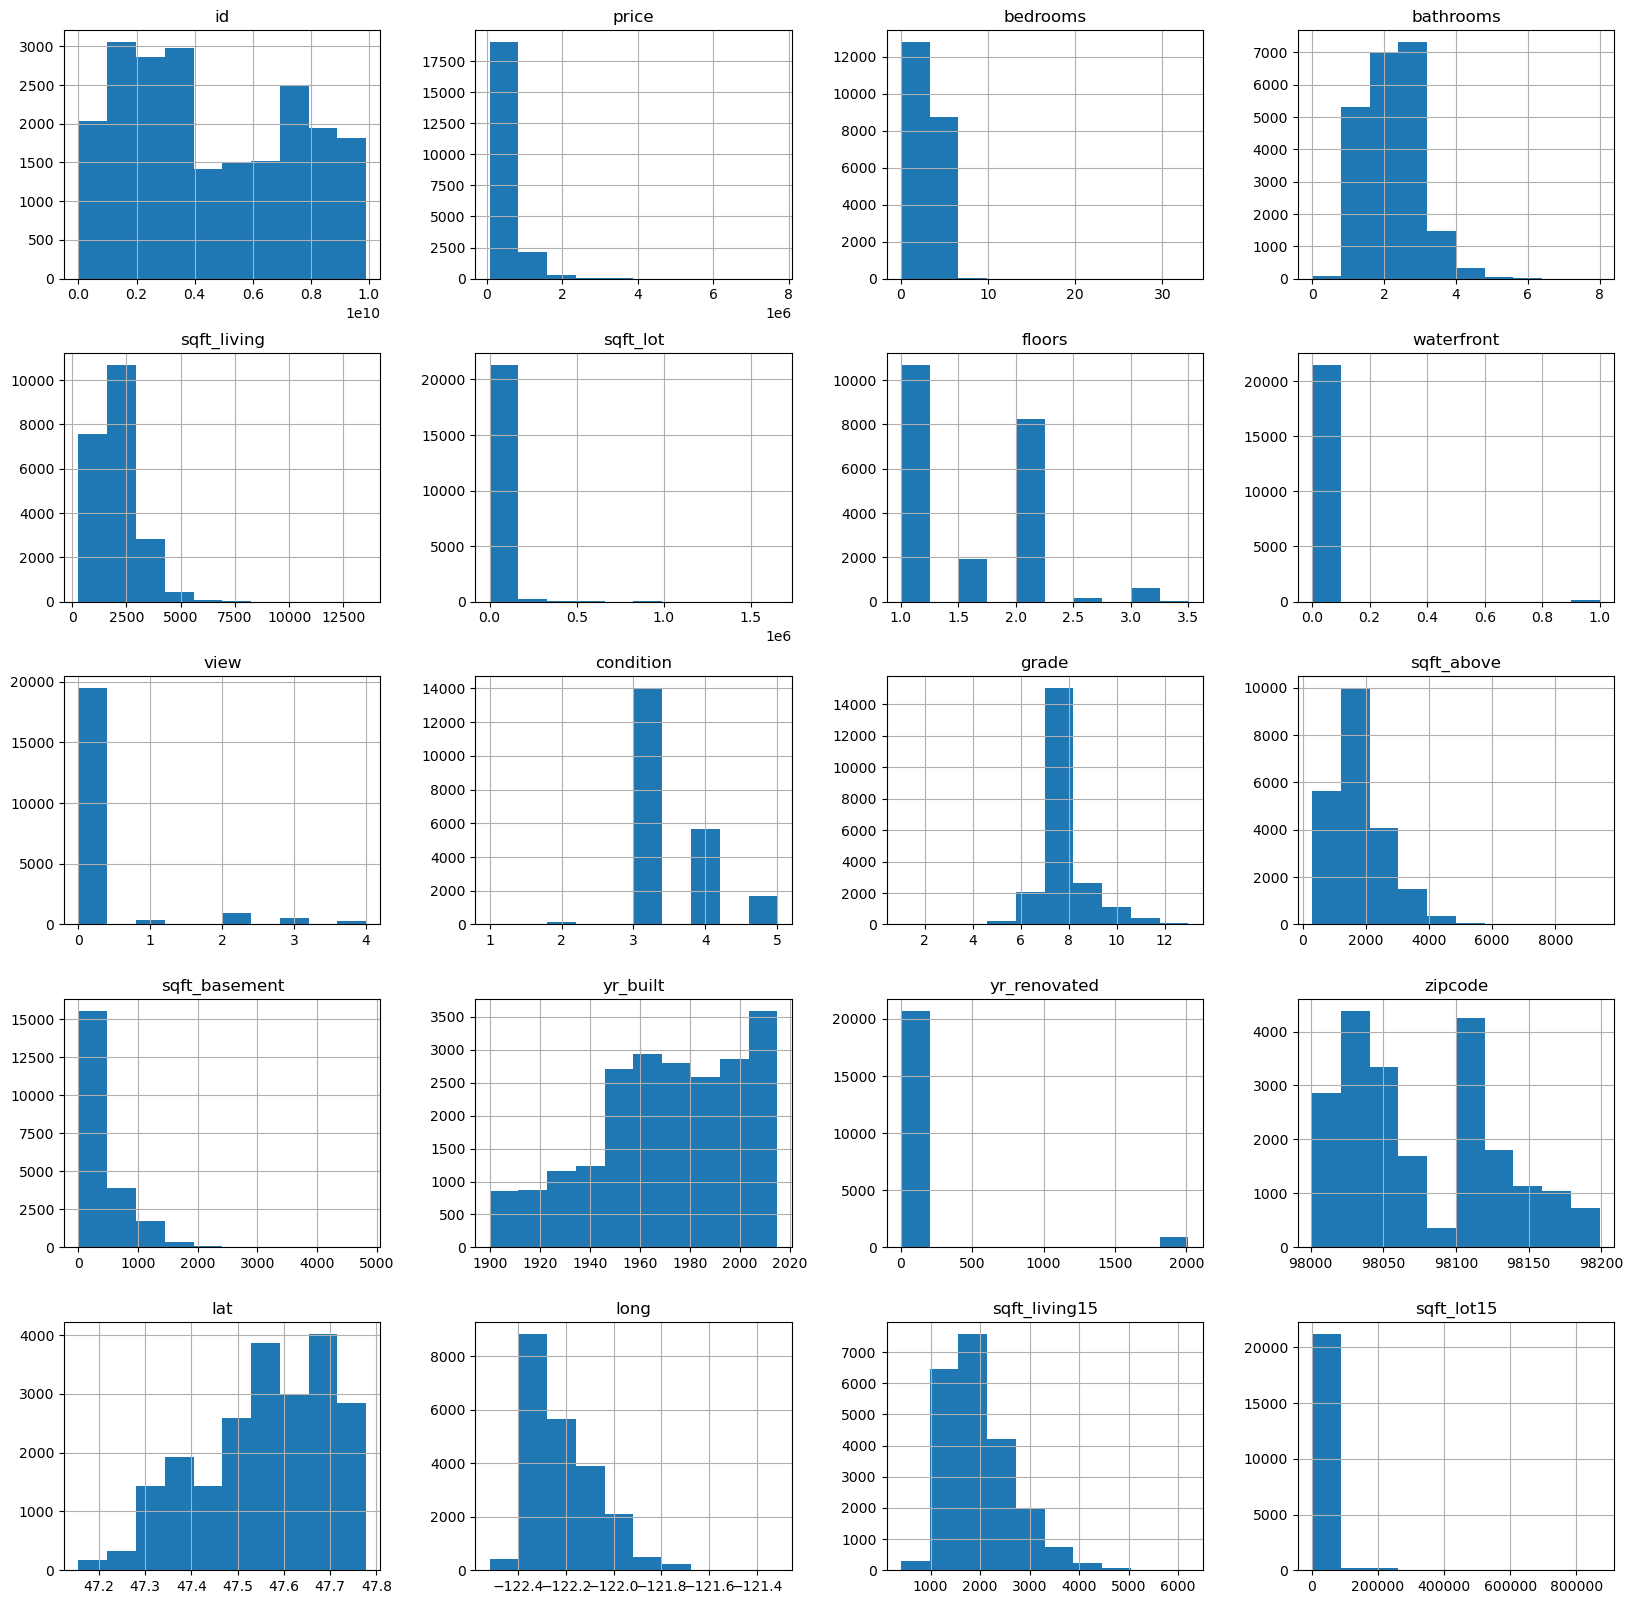

In [9]:
data.hist(figsize=(20,20));

Visualizing histograms helps us quickly understand the data distribution within each column, identify potential outliers, and gain insights into the overall shape of the data distribution.

**Findings**

It is important to note that many of the variables in our dataset do not follow a normal distribution, and some variables have dramatically different scales. While this may cause issues with satisfying all regression assumptions, I will address these issues as they arise. It is worth noting that regression does not necessarily require features to be normally distributed.

- Except of the date, all columns are numeric, so we don't need to handle dummy variables.

- waterfront is a binary discrete variable (0 = not waterfront, 1 = waterfront)

- sqft_above + sqft_basement = sqft_living

- sqft_basement, view, and yr_renovated have many zero values, potentially express them as binary variables

We can assign our categorical and continuous variables:

- categorical variables: floors, view, grade, zipcode, bathrooms, bedrooms, condition

- continuous variables: price, sqft_living, sqft_lot, sqft_above, sqft_basement, yr_built, yr_renovated, lat, long, sqft_living15, sqft_lot15


### Step 4: Data Cleaning

Data cleaning is a vital process in the machine learning (ML) pipeline. It involves identifying and correcting or removing any missing, duplicate, or irrelevant data. The ultimate objective of data cleaning is to ensure that the data is accurate, consistent, and error-free. Incorrect or inconsistent data can have a detrimental impact on the performance of the ML model.

I have converted the `date` column into datetime format and then extracted the year to calculate the age of the house when it was sold. This is a common preprocessing step in data analysis or machine learning tasks. The age of each home could be a factor influencing house prices.

In [10]:
# to process the `data` and extract the year to calculate the house's age.
data['year_sold'] = pd.to_datetime(data['date']).dt.date.astype('datetime64[ns]')
data['year_sold'] = pd.DatetimeIndex(data['year_sold']).year # extract only year

In [11]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650,2014
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062,2015
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503,2015


I dropped unnecessary columns such as "ID" and "Data" for my analysis.

In [12]:
data = data.drop(['id', 'date'],axis=1)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503,2015


Using the function `isnull`, I can visualize which columns have missing values.

In [13]:
# checking for null values/missing values
data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year_sold        0
dtype: int64

By using this code, I remove only the two rows that contain missing values in the column "Soft_above"

In [14]:
data.dropna(inplace=True)

In [15]:
#data.dropna(subset=data.columns, thresh=len(data.columns) - 1, inplace=True)

In [16]:
data.isnull().sum().sum()

0

In [17]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503,2015


Using the `unique()` function, we can extract the unique elements from an array or data frame column. This can be useful for data analysis and preprocessing.

In [18]:
data.nunique()

price            4028
bedrooms           13
bathrooms          30
sqft_living      1038
sqft_lot         9782
floors              6
waterfront          2
view                5
condition           5
grade              12
sqft_above        946
sqft_basement     306
yr_built          116
yr_renovated       70
zipcode            70
lat              5034
long              752
sqft_living15     777
sqft_lot15       8689
year_sold           2
dtype: int64

In [19]:
data["yr_built"].unique() 

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1921, 1969, 1947, 1968, 1985, 1941,
       1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000, 1984,
       2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973, 1925,
       1989, 1972, 1916, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935], dtype=int64)

In [20]:
data['bedrooms'].unique() 

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33], dtype=int64)

In [21]:
data.replace({'bedrooms': {33: 3}}, inplace=True)
data.bedrooms.value_counts()

bedrooms
3     9824
4     6881
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
Name: count, dtype: int64

**Findings**
  
Upon investigation, it is highly likely that the value was recorded incorrectly and would seem more in alignment with properties with 3 bedrooms rather than 33 bedrooms. This is extremely anomalous.
33 bedrooms is an outlier, potentially replace with 3 bedrooms.

In [22]:
data['bathrooms'].unique() 

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 0.  , 1.25, 5.25, 6.  , 0.5 ,
       5.5 , 6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [23]:
data['floors'].unique() 

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [24]:
# changing float to integer
data['bathrooms'] = data['bathrooms'].astype(int)
data['floors'] = data['floors'].astype(int)

In [25]:
data[data.bathrooms==0].sort_values('price', ascending=False)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold
6994,1295650.0,0,0,4810,28008,2,0,0,3,12,4810.0,0,1990,0,98053,47.6642,-122.069,4740,35061,2014
875,1095000.0,0,0,3064,4764,3,0,2,3,7,3064.0,0,1990,0,98102,47.6362,-122.322,2360,4000,2014
7606,785000.0,2,0,1260,4800,1,0,2,4,6,1080.0,180,1942,0,98033,47.6843,-122.212,2660,7200,2014
19198,699999.0,3,0,1240,4000,1,0,0,4,7,1240.0,0,1968,0,98112,47.6239,-122.297,1460,4000,2015
2680,562100.0,2,0,1440,3700,1,0,0,3,7,1200.0,240,1914,0,98107,47.6707,-122.364,1440,4300,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10424,109000.0,2,0,580,6900,1,0,0,3,5,580.0,0,1941,0,98118,47.5135,-122.262,1570,5040,2015
16340,100000.0,2,0,660,5240,1,0,0,4,4,660.0,0,1912,0,98032,47.3881,-122.234,850,5080,2014
3805,95000.0,1,0,760,5746,1,0,0,4,5,760.0,0,1915,0,98002,47.3046,-122.215,970,6696,2015
465,80000.0,1,0,430,5050,1,0,0,2,4,430.0,0,1912,0,98014,47.6499,-121.909,1200,7500,2014


In [26]:
data.replace({'bathrooms': {0: 0.25}}, inplace=True)
data.bathrooms.value_counts()

bathrooms
2.00    10541
1.00     8354
3.00     2228
4.00      338
0.25       86
5.00       48
6.00       12
8.00        2
7.00        2
Name: count, dtype: int64

**Observation**
  
I suggest replacing the zero values in the bathroom column with 0.25. This is because every property must have at least one bathroom, whereas it is possible for a property to have zero bedrooms, such as a studio apartment. As we have already established that the number of bathrooms has a significant impact on the property's price, it is essential to assign a value to the zero entries.

In [27]:
data.duplicated().sum()

4

In [28]:
data = data.drop_duplicates()
data.duplicated().sum()

0

In [29]:
data.shape

(21607, 20)

### Setp 05 - Creating Feature Engineering

The objective of feature engineering is to get the data ready for machine learning algorithms and enhance the models' performance. The various techniques involved in feature engineering include performing transformations or scaling, binning, and creating new features based on your exploratory data analysis.

Understanding the real estate market is important to better understand the features in the data. "Price per Square feet" is a term that is often used in this context. It is the price for each square foot of the property and is calculated by dividing the price by the total area of the house. However, on observing our data, we have noticed that there is no total square area. Instead, we have square feet areas for the living room, parking lot, basement, and something called "above," which we will assume means all other areas of the house not specified. To estimate the "total area" feature for each house, we can add up these individual areas. Additionally, we could include an age feature for each house, as this may also influence house prices. We could also include whether or not the house has been renovated as another feature.

In [30]:
#data["Home_Age"] = 2024 - data["yr_built"]
data['Home_Age'] = (data['year_sold'] - data['yr_built']).astype(int)
data['is_renovated'] = data["yr_renovated"].where(data["yr_renovated"] == 0, 1)
data['Total_Area'] = data['sqft_living'] + data['sqft_lot'] + data['sqft_above'] + data['sqft_basement'] 
data['Basement'] = data['sqft_basement'].where(data["sqft_basement"] == 0, 1)

In [31]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,Home_Age,is_renovated,Total_Area,Basement
0,221900.0,3,1.0,1180,5650,1,0,0,3,7,...,98178,47.5112,-122.257,1340,5650,2014,59,0,8010.0,0
1,538000.0,3,2.0,2570,7242,2,0,0,3,7,...,98125,47.7210,-122.319,1690,7639,2014,63,1,12382.0,1
2,180000.0,2,1.0,770,10000,1,0,0,3,6,...,98028,47.7379,-122.233,2720,8062,2015,82,0,11540.0,0
3,604000.0,4,3.0,1960,5000,1,0,0,5,7,...,98136,47.5208,-122.393,1360,5000,2014,49,0,8920.0,1
4,510000.0,3,2.0,1680,8080,1,0,0,3,8,...,98074,47.6168,-122.045,1800,7503,2015,28,0,11440.0,0


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21607 entries, 0 to 21612
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21607 non-null  float64
 1   bedrooms       21607 non-null  int64  
 2   bathrooms      21607 non-null  float64
 3   sqft_living    21607 non-null  int64  
 4   sqft_lot       21607 non-null  int64  
 5   floors         21607 non-null  int32  
 6   waterfront     21607 non-null  int64  
 7   view           21607 non-null  int64  
 8   condition      21607 non-null  int64  
 9   grade          21607 non-null  int64  
 10  sqft_above     21607 non-null  float64
 11  sqft_basement  21607 non-null  int64  
 12  yr_built       21607 non-null  int64  
 13  yr_renovated   21607 non-null  int64  
 14  zipcode        21607 non-null  int64  
 15  lat            21607 non-null  float64
 16  long           21607 non-null  float64
 17  sqft_living15  21607 non-null  int64  
 18  sqft_lot15 

I will use a boxplot to analyze the distribution of prices.

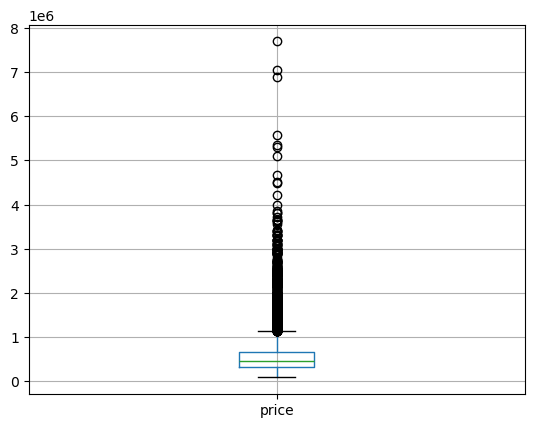

In [33]:
data.boxplot(column = 'price')
plt.show()

**Findings**

Our target contains outliers.

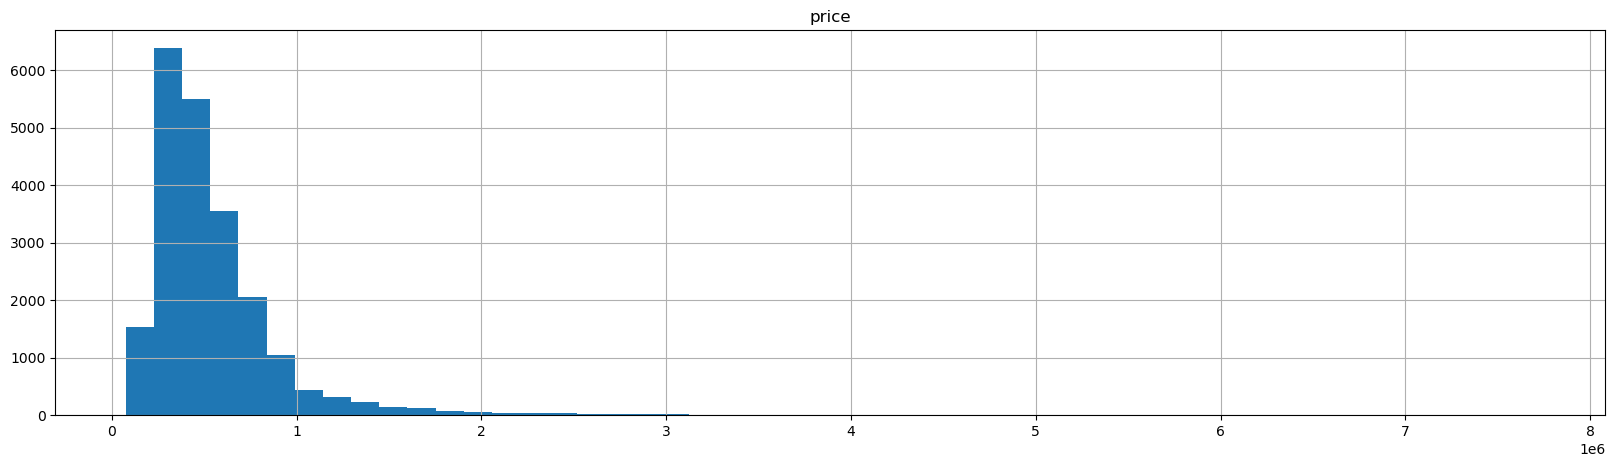

In [34]:
data.hist(column = 'price', bins = 50, figsize = (20, 5))
plt.show()

**Findings**

The data is positively skewed with a wide price range and many outliers, but this does not indicate incorrect data.

**Correlation Matrix to find the relationship between the variables**

I want to investigate which features are strongly associated with price by examining their correlation

In [35]:
house_corr = data.corr()

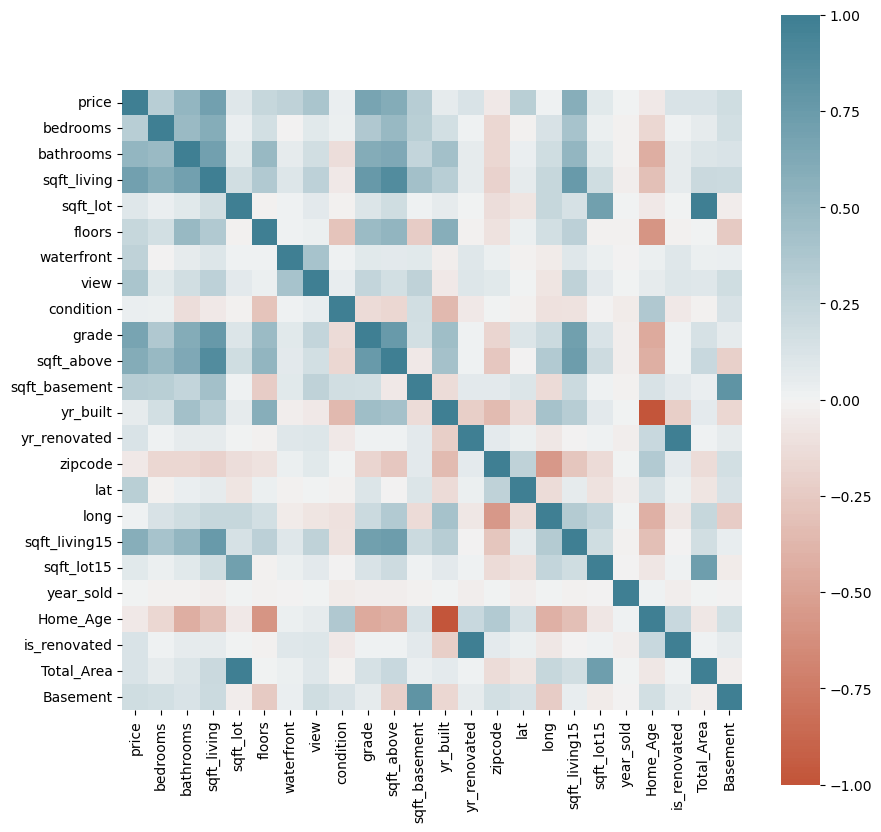

In [36]:
plt.figure(figsize=(10,10))
sns.heatmap(house_corr, 
    xticklabels = house_corr.columns.values, # x labels
    yticklabels = house_corr.columns.values, # y labels
    vmin = -1, # color scale the min value
    vmax = 1, # color scale the max
    center = 0, # color scale place at the center at 0
    cmap = sns.diverging_palette(20, 220, n = 200), # color palette
    square = True) # each cell will be square-shaped
plt.show()

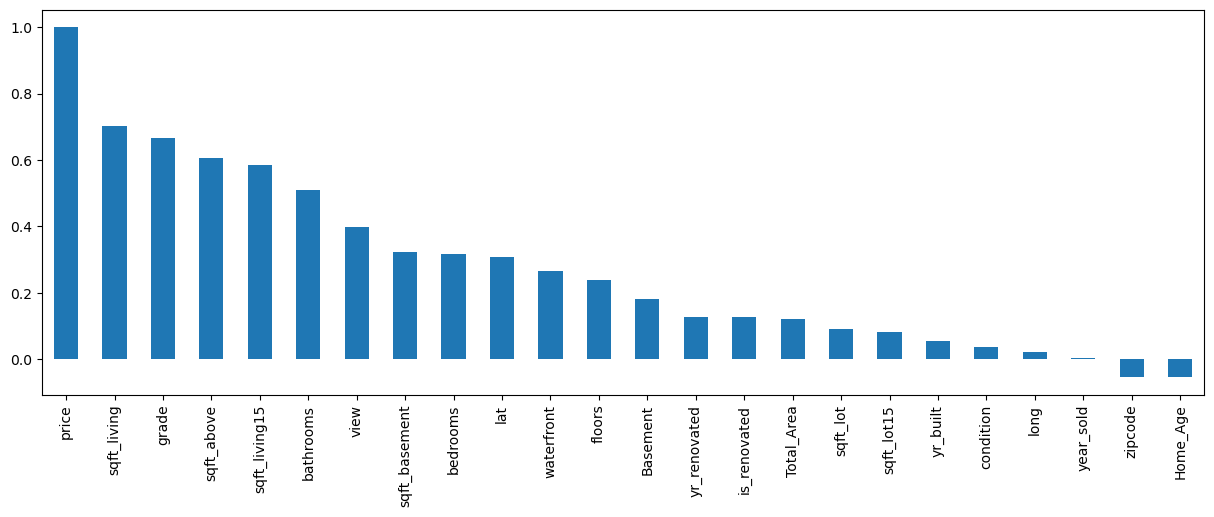

In [37]:
house_corr['price'].sort_values(ascending = False).plot.bar(figsize=(15,5))
plt.show()

In [38]:
correlation_with_price = data.corr()['price'].sort_values(ascending=False)
print(correlation_with_price)

price            1.000000
sqft_living      0.702056
grade            0.667527
sqft_above       0.605557
sqft_living15    0.585376
bathrooms        0.510793
view             0.397412
sqft_basement    0.323859
bedrooms         0.315428
lat              0.307007
waterfront       0.266372
floors           0.237325
Basement         0.180279
yr_renovated     0.126490
is_renovated     0.126150
Total_Area       0.119751
sqft_lot         0.089651
sqft_lot15       0.082434
yr_built         0.054061
condition        0.036358
long             0.021575
year_sold        0.003605
zipcode         -0.053163
Home_Age        -0.054000
Name: price, dtype: float64


**Findings**

It is important to note that price is strongly correlated with sqft_living and grade. Additionally, it has a medium correlation with bedrooms, sqft_above, and sqft_living15, while having a low correlation with bedrooms, floors, sqft_basement, and latitude. On the other hand, there is no significant relationship between price and sqft_lot, yr_built, long, and sqft_lot15. Keeping these correlations in mind will be helpful in guiding our decision for initial feature selection while developing various models.

#### Data Visualization

Several factors can influence the sale of a house. I will explore some features based on the correlation with the target price.

##### Price vs. Living Space

Is there a correlation between the size of a living space and its selling price?

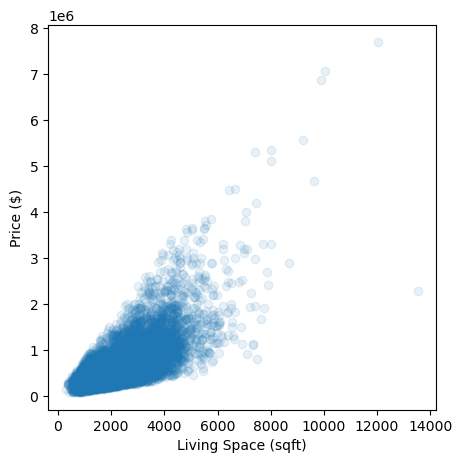

In [39]:
plt.figure(figsize=(5,5))
plt.scatter(data['sqft_living'], data['price'], alpha = 0.1)
plt.xlabel("Living Space (sqft)")
plt.ylabel("Price ($)")
plt.show()

**Findings**
  
The price and square footage of living space are positively correlated.

##### Price vs. Grade

In [40]:
Is there a correlation between a superior grade and a higher selling price?

Object `price` not found.


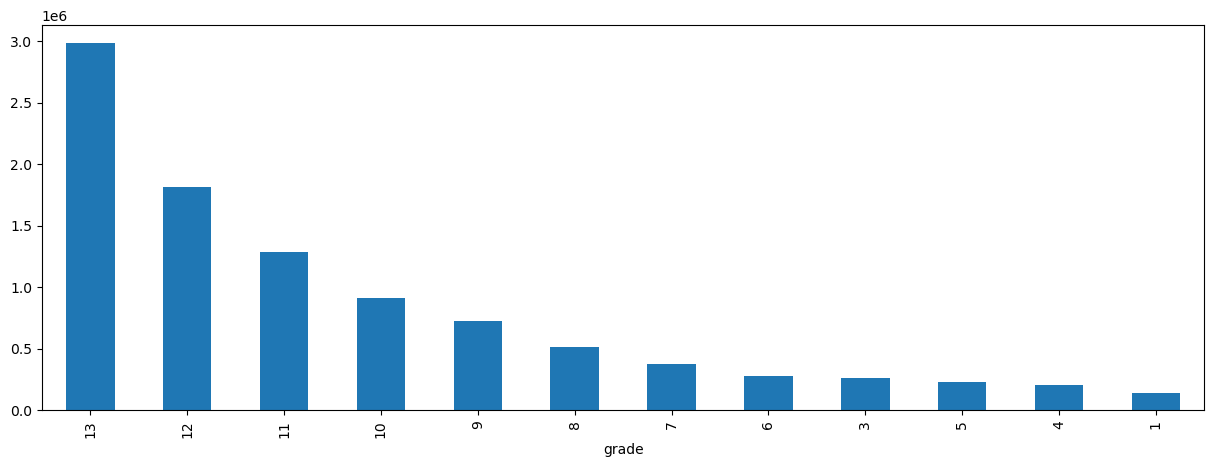

In [41]:
price_grade_med = data.groupby("grade")['price'].median()
price_grade_med.sort_values(ascending = False).plot.bar(figsize=(15,5))
plt.show()

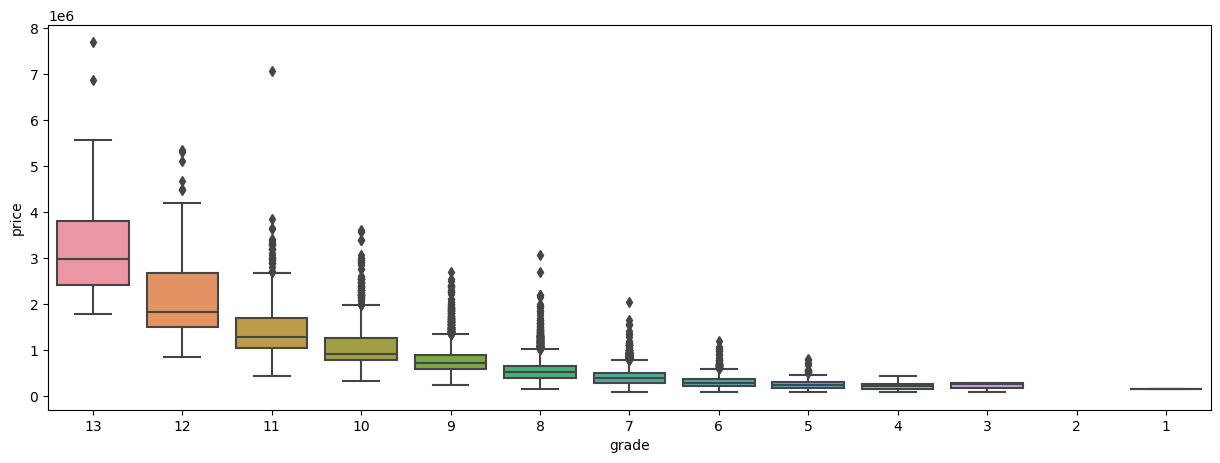

In [42]:
plt.figure(figsize=(15, 5))
orders = list(reversed(range(1, 14)))
sns.boxplot(x = data['grade'], y = data['price'], order = orders)
plt.show()

**Findigs**

The price of higher-grade items tends to be higher.

#### Price vs. bathrooms

Will we be able to sell at a higher price if we have more bathrooms?

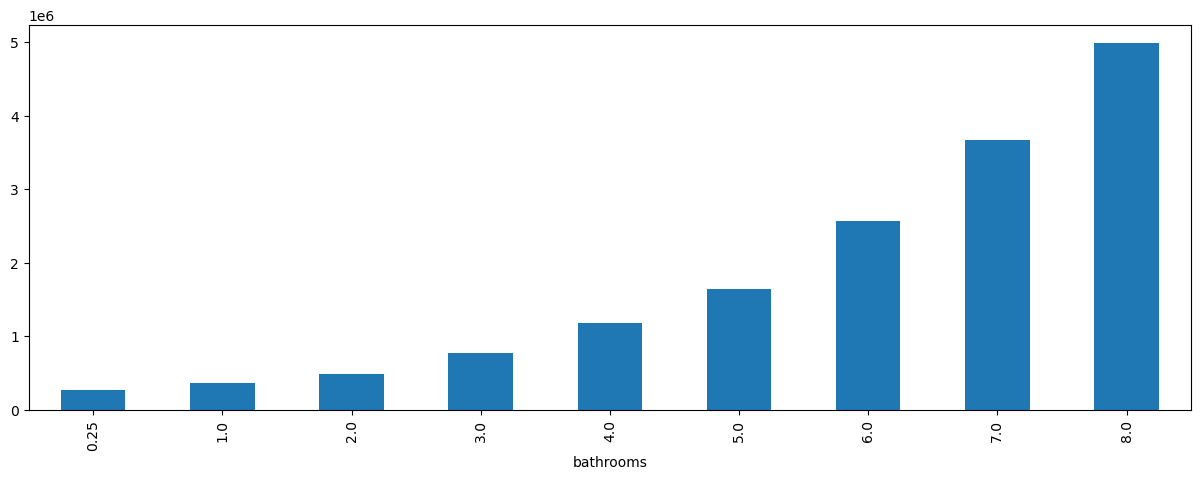

In [43]:
price_bathrooms_med = data.groupby("bathrooms")['price'].median()
price_bathrooms_med.plot.bar(figsize=(15,5))
plt.show()

In [44]:
data.groupby("bathrooms")['price'].count()

bathrooms
0.25       86
1.00     8353
2.00    10538
3.00     2228
4.00      338
5.00       48
6.00       12
7.00        2
8.00        2
Name: price, dtype: int64

**Findigs**

The presence of a greater number of bathrooms is associated with a higher price point. However, the observation of 8 bathrooms not commanding a favorable price is inconclusive, as it represents a singular data point. A more comprehensive dataset is required to establish a valid correlation between the number of bathrooms and property price.

##### Price vs. view

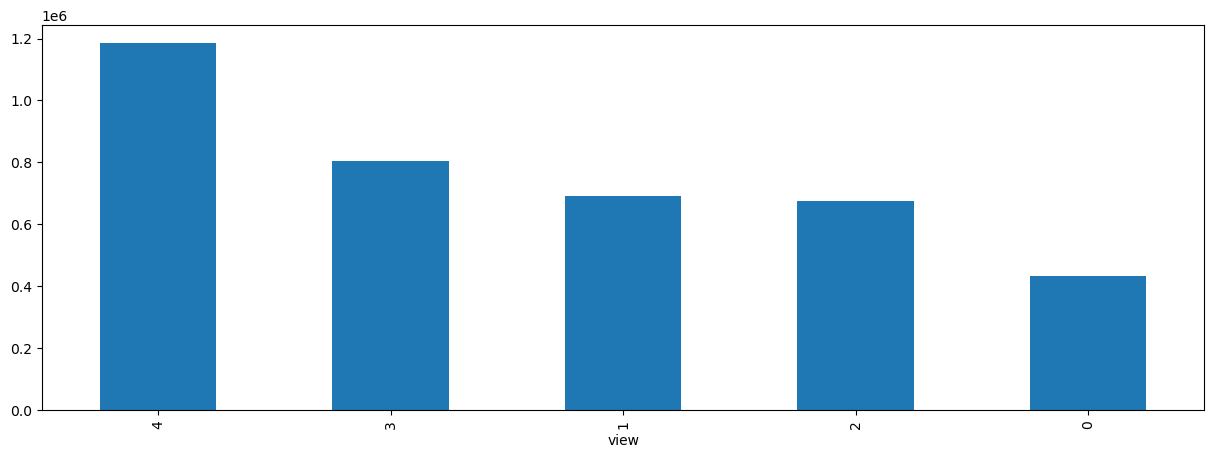

In [45]:
price_view_med = data.groupby("view")['price'].median()
price_view_med.sort_values(ascending = False).plot.bar(figsize=(15,5))
plt.show()

#### Price vs. age of the house

**Binning the age**

To develop my analysis, I created a cluster of the columns `Home_Age_Binned`

Method Binned -> I used the technique pd.cut(), which is a pandas function to segment and sort data values into bins.

In [46]:
bins = [-2, 1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 100000]
labels = ['<1', '1-10', '11-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '>100'] # e.g., (1-10]
data['Home_Age_binned'] = pd.cut(data['Home_Age'], bins = bins, labels = labels)

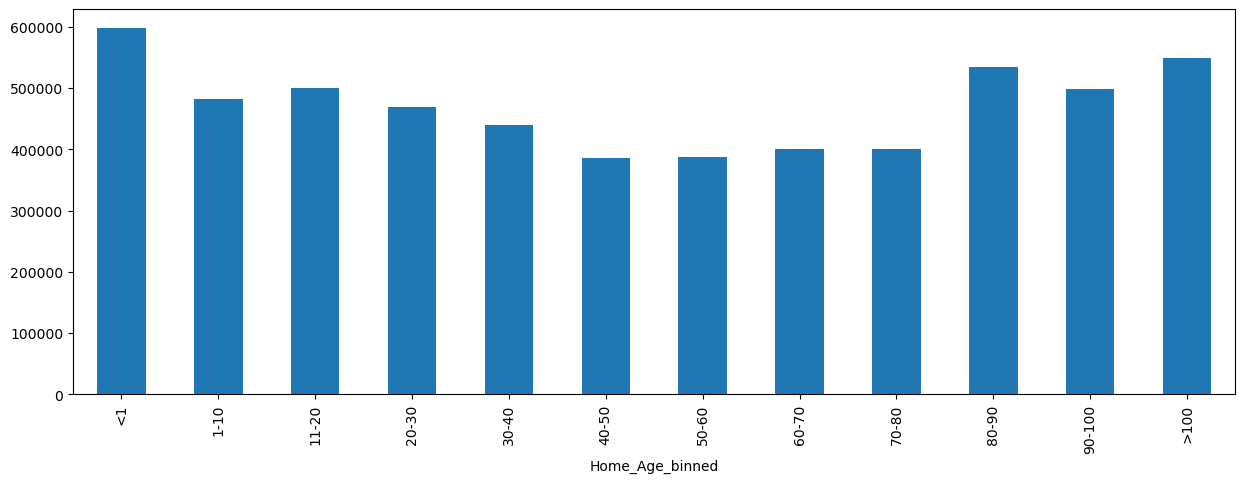

In [47]:
price_Home_Age_binne_med = data.groupby("Home_Age_binned")['price'].median()
price_Home_Age_binne_med.plot.bar(figsize=(15,5))
plt.show()

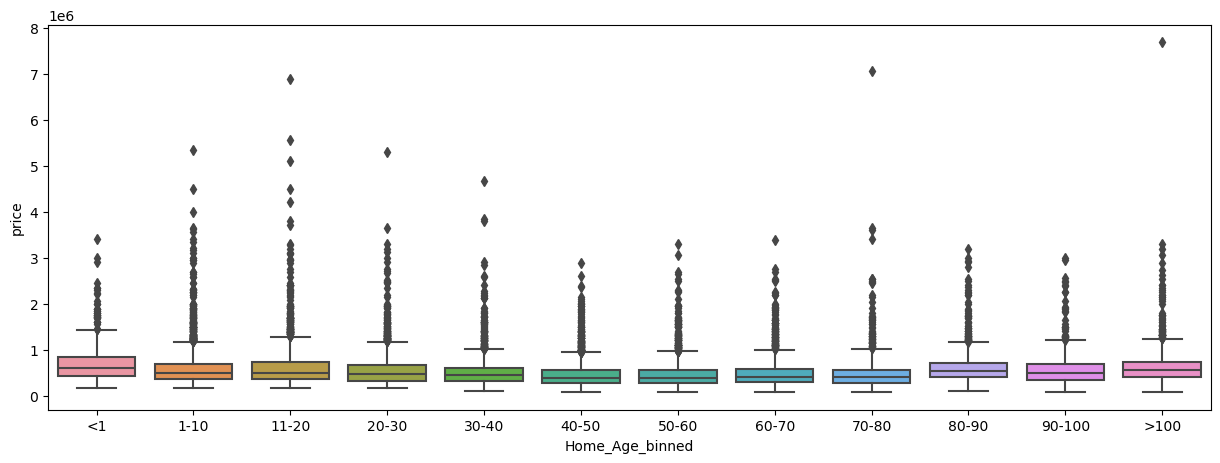

In [48]:
plt.figure(figsize=(15, 5))
sns.boxplot(x = data['Home_Age_binned'], y = data['price'])
plt.show()

In [49]:
data.groupby("Home_Age_binned")['price'].count()

Home_Age_binned
<1         726
1-10      2727
11-20     2518
20-30     2471
30-40     2535
40-50     2131
50-60     2542
60-70     2033
70-80     1057
80-90     1026
90-100     829
>100      1012
Name: price, dtype: int64

**Findings**
  
It is important to note that the median price only remains consistent for houses that are between 11 and 50 years old. However, it is interesting to observe that houses over 50 years old are increasing in value, which could be attributed to their antique nature. Our correlation table indicates that there is no strong inverse correlation between the age of the house and its price.

### Dealing with outliers in our data

I will create a new feature called price_per_sqft_living and a new feature called price_per_total_area to handle the outlier prices we discussed earlier.

**Observation**

I binned the column "Home Age" just to improve the visualization, and that is why I decided to exclude it for the next step.

In [50]:
data = data.drop(['Home_Age_binned'],axis=1)
data["price_per_sqft_living"] = data["price"]/data["sqft_living"]
data["price_per_total_area"] = data["price"]/data["Total_Area"]

In [51]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,long,sqft_living15,sqft_lot15,year_sold,Home_Age,is_renovated,Total_Area,Basement,price_per_sqft_living,price_per_total_area
0,221900.0,3,1.0,1180,5650,1,0,0,3,7,...,-122.257,1340,5650,2014,59,0,8010.0,0,188.050847,27.702871
1,538000.0,3,2.0,2570,7242,2,0,0,3,7,...,-122.319,1690,7639,2014,63,1,12382.0,1,209.338521,43.450170
2,180000.0,2,1.0,770,10000,1,0,0,3,6,...,-122.233,2720,8062,2015,82,0,11540.0,0,233.766234,15.597920
3,604000.0,4,3.0,1960,5000,1,0,0,5,7,...,-122.393,1360,5000,2014,49,0,8920.0,1,308.163265,67.713004
4,510000.0,3,2.0,1680,8080,1,0,0,3,8,...,-122.045,1800,7503,2015,28,0,11440.0,0,303.571429,44.580420


Verifying the price per total area feature statistic.

In [52]:
data['price_per_total_area'].describe()
    

count    21607.000000
mean        46.522058
std         31.029944
min          0.162920
25%         24.170568
50%         38.677546
75%         61.594738
max        248.552124
Name: price_per_total_area, dtype: float64

**Findings**

It is common for the mean to be significantly higher than the median in cases of right skewness. This can lead to errors in our model's predictions. In our data, there is a significant skew, with the maximum value being 248 while 75 percent of the data is at most 61.6. This skew is quite large and should be taken into account when analyzing the data.

To remove this skew,  I shoulded set our data to cover areas 1 or 2 standard deviations above the mean.

In [53]:
data[data['price_per_total_area'] > 100]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,long,sqft_living15,sqft_lot15,year_sold,Home_Age,is_renovated,Total_Area,Basement,price_per_sqft_living,price_per_total_area
26,937000.0,3,1.00,2450,2691,2,0,0,3,8,...,-122.360,1760,3573,2014,99,0,7591.0,1,382.448980,123.435647
27,667000.0,3,1.00,1400,1581,1,0,0,5,8,...,-122.314,1860,3861,2014,105,0,4381.0,0,476.428571,152.248345
33,535000.0,3,1.00,1090,3000,1,0,0,4,8,...,-122.375,1570,5080,2014,85,0,5180.0,0,490.825688,103.281853
43,685000.0,3,1.00,1570,2280,2,0,0,3,7,...,-122.364,1580,2640,2014,92,0,5420.0,0,436.305732,126.383764
63,549000.0,3,1.00,1540,1044,3,0,0,3,8,...,-122.320,1580,3090,2014,0,0,4124.0,0,356.493506,133.123181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21601,467000.0,3,2.00,1425,1179,3,0,0,3,8,...,-122.318,1285,1253,2015,7,0,4029.0,0,327.719298,115.909655
21604,429000.0,3,2.00,1490,1126,3,0,0,3,8,...,-122.288,1400,1230,2015,1,0,4106.0,0,287.919463,104.481247
21607,475000.0,3,2.00,1310,1294,2,0,0,3,8,...,-122.409,1330,1265,2015,7,0,3914.0,1,362.595420,121.359223
21610,402101.0,2,0.25,1020,1350,2,0,0,3,7,...,-122.299,1020,2007,2014,5,0,3390.0,0,394.216667,118.613864


In [54]:
data[data['price_per_total_area']<= 5]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,long,sqft_living15,sqft_lot15,year_sold,Home_Age,is_renovated,Total_Area,Basement,price_per_sqft_living,price_per_total_area
145,921500.0,4,2.0,3670,315374,2,0,0,4,9,...,-122.026,2840,87991,2014,20,0,322714.0,0,251.089918,2.855470
199,385000.0,3,1.0,1350,155073,1,0,0,4,7,...,-121.994,1560,50965,2014,45,0,157773.0,0,285.185185,2.440215
236,416000.0,3,2.0,2220,94300,1,0,0,5,7,...,-121.950,2070,80100,2015,39,0,98740.0,1,187.387387,4.213085
238,800000.0,3,3.0,3830,221284,2,0,0,3,10,...,-122.023,2920,148539,2014,21,0,228944.0,1,208.877285,3.494304
311,201000.0,5,1.0,1660,78408,1,0,0,3,6,...,-121.837,1660,78408,2014,99,0,81728.0,0,121.084337,2.459377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21325,659000.0,3,2.0,3090,384634,2,0,0,3,8,...,-121.927,2200,292645,2014,7,0,390814.0,0,213.268608,1.686224
21351,565000.0,2,1.0,1130,276170,1,0,0,3,8,...,-122.027,2092,217800,2014,8,0,278430.0,0,500.000000,2.029235
21361,472000.0,3,2.0,3800,104979,2,0,0,3,8,...,-121.841,2040,109771,2014,9,0,112579.0,1,124.210526,4.192611
21386,320000.0,3,1.0,1790,66250,1,0,0,3,7,...,-121.403,1440,59346,2015,12,0,69830.0,0,178.770950,4.582558


In [55]:
data = data[data['price_per_total_area'] <= 100]
data = data[data['price_per_total_area'] > 5]

In [56]:
data.shape

(19597, 26)

I’ve filtered out some outliers, so the next step will be to look at the price_per_sqft_living feature statistics.

In [57]:
data['price_per_sqft_living'].describe()

count    19597.000000
mean       251.730380
std         99.028193
min         87.588235
25%        178.010471
50%        236.318408
75%        300.546448
max        792.682927
Name: price_per_sqft_living, dtype: float64

The mean is higher than the median, although not by much, and the standard deviation is low here, too; this means this data is not as dispersed as the total area above. Nonetheless, it still shows a lot of outlier prices. This feature probably behaves more like how we would expect the price per sqft to.

Any price_per_sqft_living value that falls below 56.925 or above 484.125 can be considered a potential outlier.

In [58]:
data = data[data['price_per_sqft_living'] <= 500]

In [59]:
data['price_per_sqft_living'].describe()

count    19105.000000
mean       243.157959
std         83.742969
min         87.588235
25%        176.639344
50%        233.263598
75%        294.117647
max        500.000000
Name: price_per_sqft_living, dtype: float64

In [60]:
data.shape

(19105, 26)

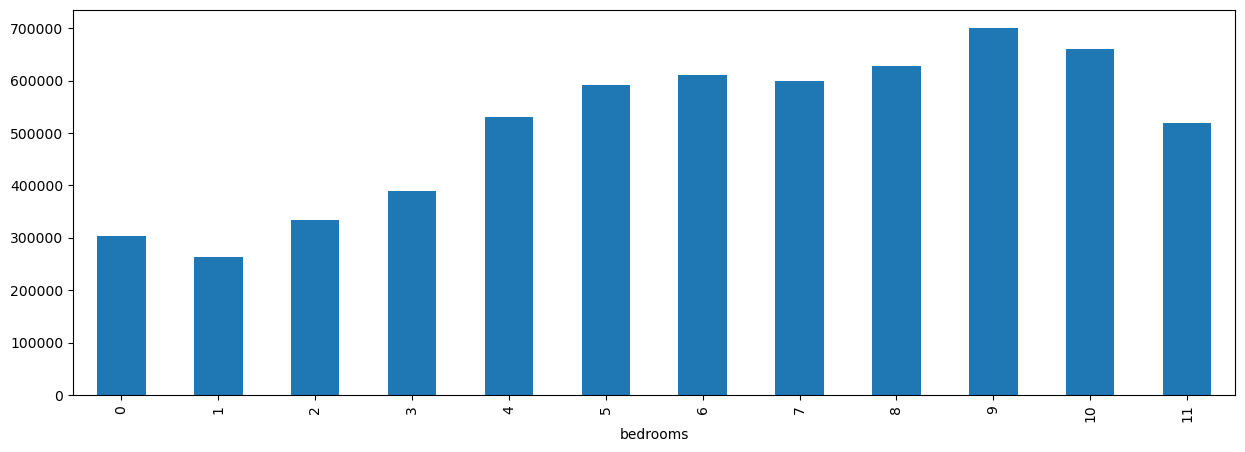

In [61]:
price_bedrooms_med = data.groupby("bedrooms")['price'].median()
price_bedrooms_med.plot.bar(figsize=(15,5))
plt.show()

In [62]:
data.bedrooms.value_counts()

bedrooms
3     8713
4     6391
2     2114
5     1455
6      238
1      131
7       34
8       10
0       10
9        5
10       3
11       1
Name: count, dtype: int64

In [63]:
data[data['bedrooms'] >= 7]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,long,sqft_living15,sqft_lot15,year_sold,Home_Age,is_renovated,Total_Area,Basement,price_per_sqft_living,price_per_total_area
556,1950000.0,7,3.0,4640,15235,2,0,1,3,11,...,-122.231,3230,20697,2014,49,1,24515.0,1,420.258621,79.543137
1135,420000.0,7,3.0,2940,8624,1,0,0,3,8,...,-122.307,1850,8031,2015,38,0,14504.0,1,142.857143,28.957529
1241,350000.0,7,3.0,2800,9569,1,0,2,3,7,...,-122.183,2150,7333,2014,51,0,15169.0,1,125.000000,23.073373
1660,490000.0,8,5.0,2800,2580,2,0,0,3,8,...,-122.303,1800,2580,2014,17,0,8180.0,1,175.000000,59.902200
3721,884900.0,7,4.0,5370,10800,1,0,0,3,8,...,-122.223,2310,10910,2015,48,0,21540.0,0,164.785847,41.081708
4024,800000.0,7,6.0,7480,41664,2,0,2,3,11,...,-122.368,2810,33190,2014,61,0,56624.0,1,106.951872,14.128285
4067,373000.0,8,3.0,2850,12714,1,0,0,3,7,...,-122.205,1480,4942,2015,56,0,18414.0,0,130.877193,20.256327
4096,599999.0,9,4.0,3830,6988,2,0,0,3,7,...,-122.338,1460,6291,2014,76,0,14648.0,1,156.657702,40.961155
4235,700000.0,9,3.0,3680,4400,2,0,0,3,7,...,-122.324,1960,2450,2015,107,0,11760.0,1,190.217391,59.523810
4717,750000.0,7,2.0,3410,4056,1,0,0,4,8,...,-122.316,2510,4056,2014,108,0,10876.0,1,219.941349,68.959176


**Findings**

Most of these houses look like outliers, so I removed them.

In [64]:
data = data[data['bedrooms'] < 7]

In [65]:
data.shape

(19052, 26)

It's a good idea to engineer some new features based on other features in our data that are important in determining house prices, even if they weren't initially shown to be correlated to the price. For instance, the type of view that a house offers usually has an impact on its price. For example, waterfront views tend to increase the price of a home. Additionally, the number of floors a house has can also influence its price.

In [66]:
data['price_per_floor'] = data['price']/data['floors']
#data['price_per_view'] = data['price']/data['view']

In [67]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_living15,sqft_lot15,year_sold,Home_Age,is_renovated,Total_Area,Basement,price_per_sqft_living,price_per_total_area,price_per_floor
0,221900.0,3,1.0,1180,5650,1,0,0,3,7,...,1340,5650,2014,59,0,8010.0,0,188.050847,27.702871,221900.0
1,538000.0,3,2.0,2570,7242,2,0,0,3,7,...,1690,7639,2014,63,1,12382.0,1,209.338521,43.450170,269000.0
2,180000.0,2,1.0,770,10000,1,0,0,3,6,...,2720,8062,2015,82,0,11540.0,0,233.766234,15.597920,180000.0
3,604000.0,4,3.0,1960,5000,1,0,0,5,7,...,1360,5000,2014,49,0,8920.0,1,308.163265,67.713004,604000.0
4,510000.0,3,2.0,1680,8080,1,0,0,3,8,...,1800,7503,2015,28,0,11440.0,0,303.571429,44.580420,510000.0


In [68]:
data.corrwith(data.price).sort_values(ascending=False)


price                    1.000000
price_per_floor          0.761596
sqft_living              0.750073
grade                    0.708525
sqft_above               0.642054
sqft_living15            0.641550
bathrooms                0.517567
price_per_sqft_living    0.506066
price_per_total_area     0.461535
lat                      0.363484
bedrooms                 0.357614
Total_Area               0.341264
view                     0.339173
sqft_basement            0.307152
floors                   0.267664
sqft_lot                 0.263850
sqft_lot15               0.178279
Basement                 0.174129
yr_built                 0.123519
waterfront               0.115823
long                     0.095366
yr_renovated             0.090092
is_renovated             0.089737
condition                0.018752
year_sold               -0.011418
zipcode                 -0.075661
Home_Age                -0.123704
dtype: float64

**Findigs**

I analyzed our real estate data and found that certain features, such as `price_per_floor`, `sqft_living`, `grade`, and `sqft_above`  have a strong linear correlation with our target label. Other features show varying degrees of correlation.

### Step 06- Building Machine Learning

It can be beneficial to drop features that have a weak linear correlation with the target variable (in this case, Price) in order to enhance model performance and minimize noise. Before constructing our models, let's begin by removing the features that exhibit poor linear correlation with Price.

In [69]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year_sold', 'Home_Age', 'is_renovated',
       'Total_Area', 'Basement', 'price_per_sqft_living',
       'price_per_total_area', 'price_per_floor'],
      dtype='object')

In [70]:
data = data.drop(['sqft_lot15', 'sqft_lot','long', 'year_sold',
                                  'waterfront', 'condition', 'zipcode',
                                 'yr_renovated', 'is_renovated', 'Basement', 
                                 'Home_Age', 'yr_built',
                                 'sqft_basement',
                                 'lat', 'bedrooms', 'Total_Area', 
                                 'floors', 'view'],axis=1)

In [71]:
data.head()

,price,bathrooms,sqft_living,grade,sqft_above,sqft_living15,price_per_sqft_living,price_per_total_area,price_per_floor
0,221900.0,1.0,1180,7,1180.0,1340,188.050847,27.702871,221900.0
1,538000.0,2.0,2570,7,2170.0,1690,209.338521,43.450170,269000.0
2,180000.0,1.0,770,6,770.0,2720,233.766234,15.597920,180000.0
3,604000.0,3.0,1960,7,1050.0,1360,308.163265,67.713004,604000.0
4,510000.0,2.0,1680,8,1680.0,1800,303.571429,44.580420,510000.0


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19052 entries, 0 to 21611
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  19052 non-null  float64
 1   bathrooms              19052 non-null  float64
 2   sqft_living            19052 non-null  int64  
 3   grade                  19052 non-null  int64  
 4   sqft_above             19052 non-null  float64
 5   sqft_living15          19052 non-null  int64  
 6   price_per_sqft_living  19052 non-null  float64
 7   price_per_total_area   19052 non-null  float64
 8   price_per_floor        19052 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 1.5 MB


In [73]:
data.isnull().sum()

price                    0
bathrooms                0
sqft_living              0
grade                    0
sqft_above               0
sqft_living15            0
price_per_sqft_living    0
price_per_total_area     0
price_per_floor          0
dtype: int64

In [74]:
data.duplicated().sum()

2

In [75]:
data = data.drop_duplicates()
data.duplicated().sum()

0

In [76]:
data.shape

(19050, 9)

### Model Development

#### Splitting the data into features and target

Before we delve into the process of creating a machine learning model to predict house prices, let's first understand the concept of data splitting. This is a crucial step in machine learning, as it helps us determine the reliability of our model. The model could easily memorize the training set and give accurate predictions for it, but this doesn't guarantee that it will work well with new data. To evaluate the model's performance, we need to test it with new data that it hasn't been trained on. We typically split the collected labeled data into two parts: one for building the model (training data or training set) and the other for assessing the model's performance (test data, test set, or hold-out set).

We're going to divide our data into two parts-features and target variables. Think of features as the characteristics of a house that might influence its price, and the target variable as the price itself. We'll use X for features and Y for the target.
Then, we split the data into training and testing datasets using Sci-kit learn's train-test-split 

In [77]:
from sklearn.model_selection import train_test_split

# Splitting the data into features and target
target = data["price"]
features = data.drop("price", axis=1)


# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                    test_size=0.3,
                                                    random_state=1)

From the code above, I split the data into a training size of 70% and a test size of 30%. Splitting the data into training and test sets is essential to evaluating how the model will perform on new data and ensuring it does not overfit the training data. 

#### Scaling our data

In machine learning algorithms, the training time and accuracy of prediction depend primarily on the similarity of feature values. When features have significantly different magnitudes or are measured in different units, data comprehension takes longer and accuracy is reduced. Scaling is crucial in regression problems. 

Different types of scalers are available such as Standard scaler, Minimum-Maximum scaler, Robust scaler, Maximum-absolute scaler and Normalizer. Among these, I will be using the Standard scaler as our dataset's features have a wide range of values. For example, in a model that predicts prices, if a feature has an extensive range of values, it will be the dominant characteristic in determining the predicted price. 

The Standard scaler resolves this issue by removing the mean and scaling the data to the unit variance, thus resizing the distribution of values so that the mean of the observed values is 0 and the standard deviation is 1. To implement the Standard scaler, I will use Sci-kit learn's in-built standard scaler.  

In [78]:
#Scaling the features
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_sc = pd.DataFrame(sc.fit_transform(X_train))
X_test_sc = pd.DataFrame(sc.transform(X_test))


#### Using Grid Search Cross Validation for choosing the best parameters of models based on obtained scores.

The primary goal of hyperparameter tuning in machine learning is to improve a model's performance by finding the best set of hyperparameters. Hyperparameters are configuration settings used to control the training process and structure of machine learning models. Proper tuning of these hyperparameters can significantly enhance a model’s predictive accuracy, efficiency, and generalization to new data. Techniques for hyperparameter tuning include Grid Search, Random Search, and Bayesian Optimization.	Grid Search systematically works through multiple combinations of parameter values, cross-validating as it goes to determine which combination provides the best performance.

In [79]:
def get_best_score(grid):
    
   best_score = np.sqrt(-grid.best_score_)
   print(best_score)    
   print(grid.best_params_)
   print(grid.best_estimator_)
    
   return best_score

In [80]:
folds = 5  # Number of folds for cross-validation

I want to use negative mean squared error (MSE) as the scoring metric for the grid search cross-validation

In [81]:
score_calc = 'neg_mean_squared_error'  

### Selecting Models

Considering the nature of the problem and the data type, I employed three machine learning algorithms: linear regression, stochastic gradient descent regression, and random forest regression. To evaluate the model's overall performance, I used R-squared (R2) score and root mean squared error (RMSE).

#### 1. Linear Regression

Linear regression is a type of supervised machine learning algorithm(an algorithm that works with only labeled data)that computes the linear relationship between a dependent variable and one or more independent features. The goal of the algorithm is to find the best line of fit that can predict the value of the dependent variable based on the independent variables.

Assign it a value specifying the number of folds to use for cross-validation

I specified the scoring metric for evaluating the model's performance during cross-validation.

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

linreg = LinearRegression()
parameters = {'fit_intercept':[True,False], 'positive':[True,False], 'copy_X':[True, False]}
grid_linear = GridSearchCV(linreg, parameters, cv = folds, verbose = 1 , scoring = score_calc)
grid_linear.fit(X_train_sc, y_train)

sc_linear = get_best_score(grid_linear)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
67106.74536702543
{'copy_X': True, 'fit_intercept': True, 'positive': True}
LinearRegression(positive=True)


In [83]:
LR = LinearRegression()
LR.fit(X_train_sc, y_train)
pred_linreg_all = LR.predict(X_train_sc)

#### Model Evaluation

Here, import linear regression, instantiate it, and fit our train features and target, then call predict on our train features.

It's possible to check the model’s overall performance by using two metrics, rsquared(r2) score, and root mean squared error(RMSE);

R-squared is a statistical measure used to evaluate how well a regression model fits the data. Its value ranges from 0 to 1. A perfect fit is indicated by an R-squared value of 1, meaning that there is no difference between the predicted and actual values. On the other hand, an R-squared value of 0 indicates that the model does not predict any variability in the data and does not establish any relationship between the dependent and independent variables. 


In [84]:
from sklearn.metrics import mean_squared_error, r2_score
pred = LR.predict(X_train_sc)
lr_mse = mean_squared_error(y_train, pred)
lr_rmse = np.sqrt(lr_mse)
lr_rmse

66958.07205510444

This means that on average we are about 67k off(below or above) the real price in our prediction.

In [85]:
y_train.describe()

count    1.333500e+04
mean     4.976442e+05
std      2.755184e+05
min      8.000000e+04
25%      3.100000e+05
50%      4.310000e+05
75%      6.137500e+05
max      3.300000e+06
Name: price, dtype: float64

The median house price is 435,000. 75% of the houses in our data are priced above 310,000, while the lowest-priced house is priced at around 80,000. Based on this, we can conclude that our margin of error in predicting a house price is at most 10% for the top 25% of houses (i.e. those priced above $310,000), at most 19% for the middle 25% of houses, and approximately 80% for the lowest priced house.

In [86]:
r2_score(y_train, pred)

0.9409340471456222

In this case, an R-squared score of 0.94 indicates an almost perfect fit between the predicted and actual values. This means that 94% of the features used in the model could explain the relationship with the house price. However, the large error obtained in RMSE could be due to some outlier errors.

#### Evaluate the test data

In [87]:
lr_test = LR.predict(X_test_sc)
LR_mse = mean_squared_error(y_test, lr_test)
LR_rmse = np.sqrt(LR_mse)
LR_rmse

67668.55575961518

The model's descriptive statistics indicate similar performance on both training and test data.

In [88]:
r2_score(y_test, lr_test)

0.9372730219998071

Similar rsquared score as our training set.

#### 2. Stochastic Gradient Descent Regressor

The SGDRegressor is a machine learning algorithm available in Sci-kit Learn that implements Stochastic Gradient Descent (SGD) for solving regression problems. It is a popular choice for handling high-dimensional datasets and large-scale regression tasks because of its fast training time and efficiency.
The algorithm works by taking a dataset as input and using the gradient descent algorithm to identify the best-fit line through the data. Predictions are then made based on this line. The algorithm is an iterative process, and each iteration finds a better-fit line with more accuracy until it achieves the best accuracy.
Let's try inputting a simple SGDR.

In [89]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor()
parameters = {'max_iter' :[10000], 'alpha':[1e-05], 'epsilon':[1e-02], 'fit_intercept' : [True]  }
grid_sgd = GridSearchCV(sgd, parameters, cv = folds, verbose = 0, scoring = score_calc)
grid_sgd.fit(X_train_sc, y_train)

sc_sgd = get_best_score(grid_sgd)
pred_sgd = grid_sgd.predict(X_train_sc)

67285.1349688383
{'alpha': 1e-05, 'epsilon': 0.01, 'fit_intercept': True, 'max_iter': 10000}
SGDRegressor(alpha=1e-05, epsilon=0.01, max_iter=10000)


In [90]:
from sklearn.linear_model import SGDRegressor
sd = SGDRegressor()
sd.fit(X_train_sc, y_train)
sd_pred = sd.predict(X_train_sc)

sd_mse = mean_squared_error(y_train, sd_pred)
sd_rmse = np.sqrt(sd_mse)
sd_rmse

67017.85722392019

This dataset is small, resulting in similar outcomes to linear regression. The rsquared score is being checked.

In [91]:
r2_score(y_train, sd_pred)

0.9408285230663246

#### Evaluate the test data

In [92]:
SD_pred = sd.predict(X_test_sc)

SD_mse = mean_squared_error(y_test, SD_pred)
SD_rmse = np.sqrt(SD_mse)
SD_rmse

67754.70926868434

In [93]:
r2_score(y_test, lr_test)

0.9372730219998071

just slightly higher than the train set.

#### 3. Random Forest Regressor


Random Forest Regression is a versatile machine learning technique used for predicting numerical values. It uses multiple decision trees to produce more accurate predictions and reduce overfitting.

In [94]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {'min_samples_split' : [3,4,6,10], 'n_estimators' : [70,100], 'random_state': [5] }
grid_rf = GridSearchCV(RandomForestRegressor(), param_grid, cv = folds, refit=True, verbose = 0, scoring = score_calc)
grid_rf.fit(X_train, y_train)

sc_rf = get_best_score(grid_rf)
pred_rf = grid_rf.predict(X_train)

25436.68037927169
{'min_samples_split': 3, 'n_estimators': 100, 'random_state': 5}
RandomForestRegressor(min_samples_split=3, random_state=5)


In [95]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train_sc, y_train)

#predicting on training set
rf_pred = rf_reg.predict(X_train_sc)
rf_mse = mean_squared_error(y_train, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_rmse

10525.303421633127

Random Forest produced an error of just under $11k, the lowest error yet. It's a powerful machine learning algorithm.

Checking its rsquared score

In [96]:
r2_score(y_train, rf_pred)

0.9985405118185124

#### Evaluate the test data

When evaluating the performance of a random forest model on new data, it tends to overfit on training data.

In [97]:
rfr_pred = rf_reg.predict(X_test_sc)

rfr_mse = mean_squared_error(y_test, rfr_pred)
rfr_rmse = np.sqrt(rfr_mse)
rfr_rmse

26508.9034188706

Despite overfitting the training data, it still provides our best performance to date on new data

In [98]:
r2_score(y_test, rfr_pred)

0.9903735961866507

#### Final Result Evaluation 

Comparing all the models used

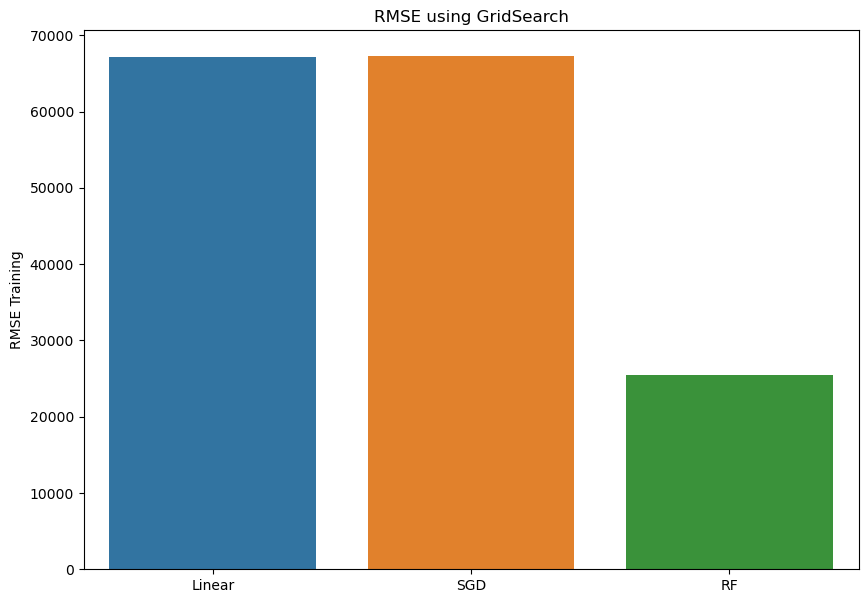

In [99]:
Grid_search_list_scores = [sc_linear,sc_sgd, sc_rf]
list_predictions = [pred_linreg_all, pred_sgd, pred_rf]
list_regressors = ['Linear','SGD','RF']
fig, ax = plt.subplots()
fig.set_size_inches(10,7)
sns.barplot(x=list_regressors, y=Grid_search_list_scores, ax=ax)
plt.ylabel('RMSE Training')
plt.title('RMSE using GridSearch')
plt.show()

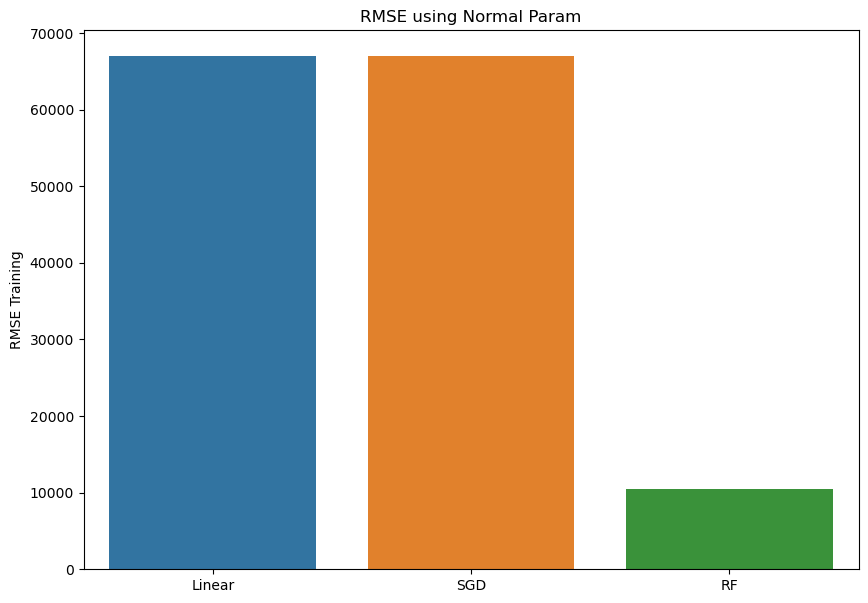

In [100]:
list_predictions = [lr_rmse, sd_rmse, rf_rmse]
list_regressors = ['Linear','SGD','RF']
fig, ax = plt.subplots()
fig.set_size_inches(10,7)
sns.barplot(x=list_regressors, y=list_predictions, ax=ax)
plt.ylabel('RMSE Training')
plt.title('RMSE using Normal Param')
plt.show()

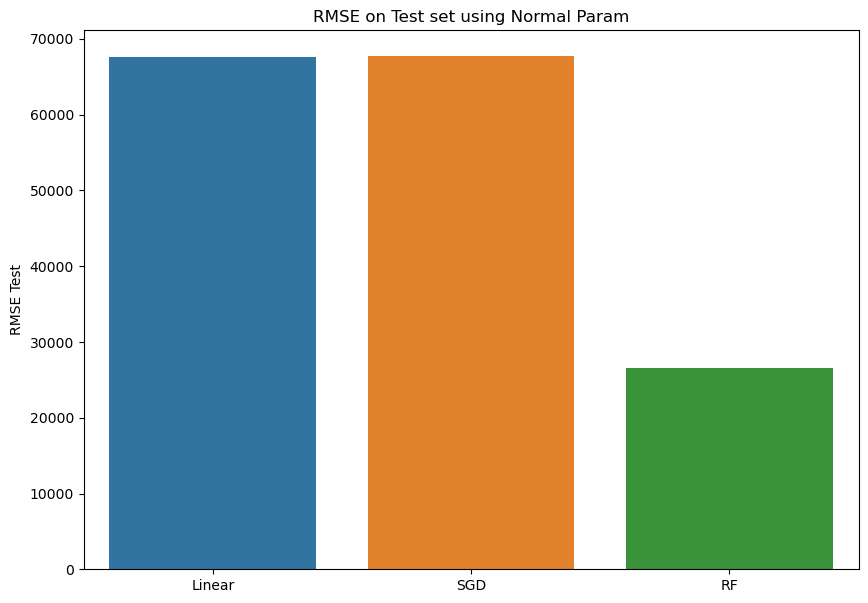

In [101]:
list_predictions = [LR_rmse, SD_rmse, rfr_rmse]
list_regressors = ['Linear','SGD','RF']
fig, ax = plt.subplots()
fig.set_size_inches(10,7)
sns.barplot(x=list_regressors, y=list_predictions, ax=ax)
plt.ylabel('RMSE Test')
plt.title('RMSE on Test set using Normal Param')
plt.show()

###  Conclusion

After evaluating the results, it can be concluded that the Random Forest Regression (RFR) model performed the best among the three models. The RFR model showed an r2_score of around 99%, indicating an excellent fit to the data. The Stochastic Gradient Descent Regression (SDR) model had a slightly lower r2_score of approximately 93.96%, but it still performed quite well. Meanwhile, the Linear Regression (LR) model showed the most modest performance among the three, with an r2_score of around 93.72%. Therefore, based on these results, the Random Forest Regression model seems to be the most suitable model for the given data.

------------------